# Shaquille Obomeghie 
## Content 
1. Import Instacart data 
2. Security implications


3. Create regional Segmentation 
- 3.1 Creating column for our region
- 3.2 Determine the spending habits between different U.S regions

4. Create an exclusion flag for low activity customers


5. Creating a profiling variable 
- 5.1 Firstly, customers will be profiled by their age group
- 5.2 Secondly, customers will be profiled by income level. I will categorize the income into 3 levels (low, middle and high)
- 5.3 Thirdly, customer will be profiled by Age and number of dependent (Parental Status) assuming dependants mean children


 6. Create Visualization For profile distribution
- 6.1 Using a pie chart to show the profile by age group
- 6.2 Using a histogram to visualize customers based on their income level
- 6.3 Using a histogram to show the parental status (to show the age level and if they havee dependants)

7. Aggregate the max, mean and min variable on a customer profile
- 7.1 Aggregate Age Group 
- 7.2 Aggregate Income Level 
- 7.3 Aggregate Parent status


 8. Compare customer profiles with regions and departments
 - 8.1 Compare age group with region 
 - 8.1.1 Compare age group by department
 - 8.2 Compare income level by region 
 - 8.2.1Compare income level by department 
 - 8.3. Compare parent status by region 
 - 8.3.1 Compare parent status by department 
 

9. Show suitable charts to illustrate results 

10. Export data 

In [3]:
# Import Libraries
import pandas as pd
import numpy as np 
import os 
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy 

### 1. Import Instacart Data 

In [4]:
path = r'/Users/shaquillelee/Documents/Instacart Basket Analysis'

In [5]:
# Import Data 
intacart_data = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'customer_product_order.pkl'))

## 2. Secuirty implications

In [6]:
#Inspect the data 
intacart_data.head() 

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,first_name,surname,gender,state,age,date_joined,no_of_dependants,martial_status,income,_merge
0,2539329.0,1,1,2,8,7,196,1.0,0.0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795.0,1,1,3,7,15,196,1.0,1.0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747.0,1,1,3,12,21,196,1.0,1.0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736.0,1,1,4,7,29,196,1.0,1.0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534.0,1,1,4,15,28,196,1.0,1.0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [7]:
pd.set_option('display.max_columns', None)


Personally identifiable information (PII) is data that can be traced back to a particular person. From the instacart database, the customer first name, last name, state of residence a dn age of customer.

# 3. Create a regional segmentation 

In [8]:
# Checking values of the states in the dataframe 
intacart_data['state'].value_counts().sort_index()

state
Alabama                 638041
Alaska                  648519
Arizona                 654005
Arkansas                636158
California              659828
Colorado                639293
Connecticut             623055
Delaware                637049
District of Columbia    613714
Florida                 629039
Georgia                 656414
Hawaii                  632922
Idaho                   607141
Illinois                633059
Indiana                 627290
Iowa                    625501
Kansas                  637570
Kentucky                632509
Louisiana               637506
Maine                   638593
Maryland                626603
Massachusetts           646378
Michigan                630956
Minnesota               647851
Mississippi             632697
Missouri                640761
Montana                 635280
Nebraska                625828
Nevada                  636163
New Hampshire           615424
New Jersey              627707
New Mexico              654499
Ne

In [9]:
# Create a list that includes that states under the various regions 
Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']

In [10]:
Midwest = ['Wisconsin', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri', 'Michigan']

In [11]:
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Kentucky', 'Tennessee','Florida', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

In [12]:
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

#### 3.1. Creating a column for our region 

In [13]:
intacart_data.loc[intacart_data['state'].isin(Northeast), 'Region'] = 'Northeast'

In [14]:
intacart_data.loc[intacart_data['state'].isin(Midwest),'Region'] = 'Midwest'

In [15]:
intacart_data.loc[intacart_data['state'].isin(South), 'Region'] = 'South'

In [16]:
intacart_data.loc[intacart_data['state'].isin(West), 'Region'] = 'West'

In [17]:
intacart_data['Region'].value_counts()

Region
South        10792300
West          8293217
Midwest       7597585
Northeast     5722939
Name: count, dtype: int64

#### 3.2. Determine the spending habits between different U.S regions

In [18]:
# Crosstab between region and spending flag 
spending_habits = pd.crosstab(intacart_data['Region'], intacart_data['Spending'], dropna = False)

In [19]:
spending_habits

Spending,High Spender,Low Spender
Region,,
Midwest,155979,7441606
Northeast,108226,5614713
South,209693,10582607
West,160354,8132863


# 4. Create an exclusion flag for low activity customers

In [20]:
# A flag showing customers that dont generate revenue. Excluding customers with less 5 orders
intacart_data.loc[intacart_data['max_order'] < 5, 'low activity exclusion'] = 'Exclude'
intacart_data.loc[intacart_data['max_order'] >= 5, 'low activity exclusion'] = 'Keep'


In [21]:
# Checking the flag 
intacart_data.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,Busiest_day,Busiest_days,busiest_period_of_the_day,max_order,loyalty_flag,average_price,Spending,median_days_since_prior_order,order_regularity,first_name,surname,gender,state,age,date_joined,no_of_dependants,martial_status,income,_merge,Region,low activity exclusion
0,2539329.0,1,1,2,8,7,196,1.0,0.0,Soda,77.0,7,9.0,Mid-range Products,Regularly busy,Regularly busy,Average Orders,10.0,New Customer,6.367797,Low Spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep
1,2398795.0,1,1,3,7,15,196,1.0,1.0,Soda,77.0,7,9.0,Mid-range Products,Regularly busy,Slowest days,Average Orders,10.0,New Customer,6.367797,Low Spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep
2,473747.0,1,1,3,12,21,196,1.0,1.0,Soda,77.0,7,9.0,Mid-range Products,Regularly busy,Slowest days,Most Orders,10.0,New Customer,6.367797,Low Spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep
3,2254736.0,1,1,4,7,29,196,1.0,1.0,Soda,77.0,7,9.0,Mid-range Products,Least Busy,Slowest days,Average Orders,10.0,New Customer,6.367797,Low Spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep
4,431534.0,1,1,4,15,28,196,1.0,1.0,Soda,77.0,7,9.0,Mid-range Products,Least Busy,Slowest days,Most Orders,10.0,New Customer,6.367797,Low Spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep


In [22]:
intacart_data.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,Busiest_day,Busiest_days,busiest_period_of_the_day,max_order,loyalty_flag,average_price,Spending,median_days_since_prior_order,order_regularity,first_name,surname,gender,state,age,date_joined,no_of_dependants,martial_status,income,_merge,Region,low activity exclusion
0,2539329.0,1,1,2,8,7,196,1.0,0.0,Soda,77.0,7,9.0,Mid-range Products,Regularly busy,Regularly busy,Average Orders,10.0,New Customer,6.367797,Low Spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep
1,2398795.0,1,1,3,7,15,196,1.0,1.0,Soda,77.0,7,9.0,Mid-range Products,Regularly busy,Slowest days,Average Orders,10.0,New Customer,6.367797,Low Spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep
2,473747.0,1,1,3,12,21,196,1.0,1.0,Soda,77.0,7,9.0,Mid-range Products,Regularly busy,Slowest days,Most Orders,10.0,New Customer,6.367797,Low Spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep
3,2254736.0,1,1,4,7,29,196,1.0,1.0,Soda,77.0,7,9.0,Mid-range Products,Least Busy,Slowest days,Average Orders,10.0,New Customer,6.367797,Low Spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep
4,431534.0,1,1,4,15,28,196,1.0,1.0,Soda,77.0,7,9.0,Mid-range Products,Least Busy,Slowest days,Most Orders,10.0,New Customer,6.367797,Low Spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep


In [23]:
# Checking the count of 'low activity exclusion' showing 
intacart_data['low activity exclusion'].value_counts()

low activity exclusion
Keep       30965686
Exclude     1440355
Name: count, dtype: int64

In [24]:
intacart_data.shape

(32406041, 35)

In [25]:
# Removing the values which are labelled 'Exclude'
instacart_new = intacart_data[intacart_data['low activity exclusion'] != 'Exclude']

In [26]:
instacart_new.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,Busiest_day,Busiest_days,busiest_period_of_the_day,max_order,loyalty_flag,average_price,Spending,median_days_since_prior_order,order_regularity,first_name,surname,gender,state,age,date_joined,no_of_dependants,martial_status,income,_merge,Region,low activity exclusion
0,2539329.0,1,1,2,8,7,196,1.0,0.0,Soda,77.0,7,9.0,Mid-range Products,Regularly busy,Regularly busy,Average Orders,10.0,New Customer,6.367797,Low Spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep
1,2398795.0,1,1,3,7,15,196,1.0,1.0,Soda,77.0,7,9.0,Mid-range Products,Regularly busy,Slowest days,Average Orders,10.0,New Customer,6.367797,Low Spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep
2,473747.0,1,1,3,12,21,196,1.0,1.0,Soda,77.0,7,9.0,Mid-range Products,Regularly busy,Slowest days,Most Orders,10.0,New Customer,6.367797,Low Spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep
3,2254736.0,1,1,4,7,29,196,1.0,1.0,Soda,77.0,7,9.0,Mid-range Products,Least Busy,Slowest days,Average Orders,10.0,New Customer,6.367797,Low Spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep
4,431534.0,1,1,4,15,28,196,1.0,1.0,Soda,77.0,7,9.0,Mid-range Products,Least Busy,Slowest days,Most Orders,10.0,New Customer,6.367797,Low Spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep


In [27]:
# New datafram is value for 'Low activity exclusion' match the value just for the 'Keep values'
instacart_new.shape

(30965686, 35)

In [28]:
instacart_new['low activity exclusion'].value_counts()

low activity exclusion
Keep    30965686
Name: count, dtype: int64

In [29]:
#Export Data For customer who have active activity level 
instacart_new.to_pickle(os.path.join(path, 'Data', 'Prepared Data', 'instacart_new_active_user.pkl'))

# 5. Creating a profiling variable 

##### 5.1 Firstly, customers will be profiled by their age group

In [30]:
instacart_new.loc[instacart_new['age'] < 25, 'age_group'] = 'Young Adult'
instacart_new.loc[(instacart_new['age'] >= 25) & (instacart_new['age'] <= 44), 'age_group'] = 'Middle Age'
instacart_new.loc[(instacart_new['age'] >= 45) & (instacart_new['age'] <= 64), 'age_group'] = 'Elderly'
instacart_new.loc[instacart_new['age'] > 64, 'age_group'] = 'Seniors'


/var/folders/z4/snghvzgj29jd9tc1ph3523_h0000gn/T/ipykernel_4690/1517804403.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  instacart_new.loc[instacart_new['age'] < 25, 'age_group'] = 'Young Adult'


In [31]:
instacart_new['age_group'].value_counts(dropna = True)

age_group
Elderly        9690405
Middle Age     9664157
Seniors        8195806
Young Adult    3415318
Name: count, dtype: int64

##### 5.2 Secondly, customers will be profiled by income level. I will categorize the income into 3 levels (low, middle and high)


In [32]:
instacart_new.loc[instacart_new['income'] < 50000, 'income_level'] = 'Low income'
instacart_new.loc[(instacart_new['income'] >= 50000) & (instacart_new['income'] <= 100000), 'income_level'] = 'Middle income'
instacart_new.loc[instacart_new['income'] > 100000, 'income_level'] = 'High income'

/var/folders/z4/snghvzgj29jd9tc1ph3523_h0000gn/T/ipykernel_4690/56098275.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  instacart_new.loc[instacart_new['income'] < 50000, 'income_level'] = 'Low income'


In [33]:
instacart_new['income_level'].value_counts()

income_level
High income      14207516
Middle income    13395487
Low income        3362683
Name: count, dtype: int64

##### 5.3 Thirdly, customer will be profiled by Age and number of dependent (Parental Status) assuming dependants mean children

In [34]:
instacart_new.loc[(instacart_new['age'] < 25) & (instacart_new['no_of_dependants'] > 0), 'Parent_status' ] = 'Young Parents'
instacart_new.loc[(instacart_new['age'] >= 25) & (instacart_new['age'] <= 44) & (instacart_new['no_of_dependants'] > 0), 'Parent_status' ] = 'Middle Aged Parents'
instacart_new.loc[(instacart_new['age'] >= 45) & (instacart_new['age'] <= 64) & (instacart_new['no_of_dependants'] > 0), 'Parent_status' ] = 'Elderly Parents'
instacart_new.loc[(instacart_new['age'] > 64) & (instacart_new['no_of_dependants'] > 0), 'Parent_status' ] = 'Senior Parents'
instacart_new.loc[instacart_new['no_of_dependants'] == 0, 'Parent_status'] = 'No dependents'

/var/folders/z4/snghvzgj29jd9tc1ph3523_h0000gn/T/ipykernel_4690/1379156636.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  instacart_new.loc[(instacart_new['age'] < 25) & (instacart_new['no_of_dependants'] > 0), 'Parent_status' ] = 'Young Parents'


In [35]:
instacart_new['Parent_status'].value_counts()

Parent_status
No dependents          7740016
Elderly Parents        7238981
Middle Aged Parents    7223144
Senior Parents         6173779
Young Parents          2589766
Name: count, dtype: int64

In [36]:
instacart_new.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,Busiest_day,Busiest_days,busiest_period_of_the_day,max_order,loyalty_flag,average_price,Spending,median_days_since_prior_order,order_regularity,first_name,surname,gender,state,age,date_joined,no_of_dependants,martial_status,income,_merge,Region,low activity exclusion,age_group,income_level,Parent_status
0,2539329.0,1,1,2,8,7,196,1.0,0.0,Soda,77.0,7,9.0,Mid-range Products,Regularly busy,Regularly busy,Average Orders,10.0,New Customer,6.367797,Low Spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep,Middle Age,Low income,Middle Aged Parents
1,2398795.0,1,1,3,7,15,196,1.0,1.0,Soda,77.0,7,9.0,Mid-range Products,Regularly busy,Slowest days,Average Orders,10.0,New Customer,6.367797,Low Spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep,Middle Age,Low income,Middle Aged Parents
2,473747.0,1,1,3,12,21,196,1.0,1.0,Soda,77.0,7,9.0,Mid-range Products,Regularly busy,Slowest days,Most Orders,10.0,New Customer,6.367797,Low Spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep,Middle Age,Low income,Middle Aged Parents
3,2254736.0,1,1,4,7,29,196,1.0,1.0,Soda,77.0,7,9.0,Mid-range Products,Least Busy,Slowest days,Average Orders,10.0,New Customer,6.367797,Low Spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep,Middle Age,Low income,Middle Aged Parents
4,431534.0,1,1,4,15,28,196,1.0,1.0,Soda,77.0,7,9.0,Mid-range Products,Least Busy,Slowest days,Most Orders,10.0,New Customer,6.367797,Low Spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep,Middle Age,Low income,Middle Aged Parents


# 6. Create Visualization For profile distribution

6.1 Using a pie chart to show the profile by age group 


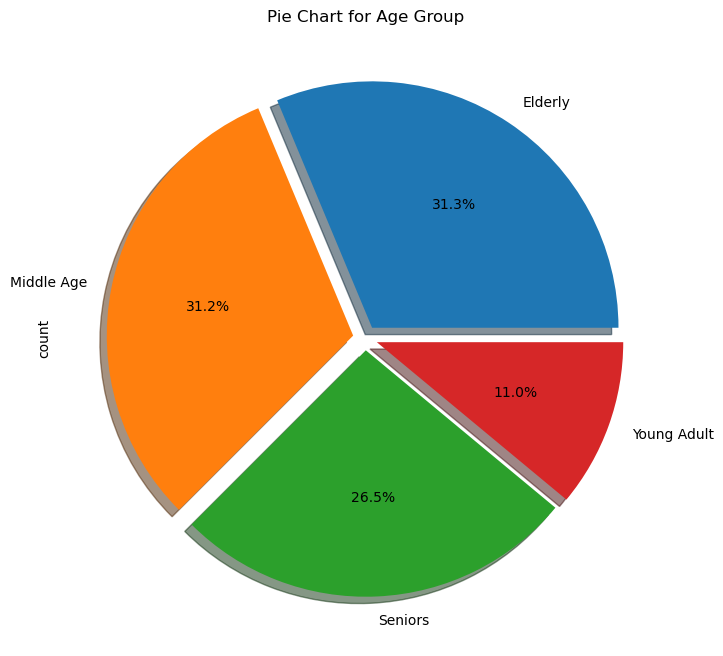

In [37]:
# Pie Chart for age group 
pie = instacart_new['age_group'].value_counts().plot.pie(explode=[0.05, 0.05,0.05,0.05], autopct='%1.1f%%', shadow=True, figsize=(8,8))
plt.title('Pie Chart for Age Group')
pie.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'pie Chart for age group.png'))


The Elderly have the highest percentage of customers 

#### 6.2 Using a histogram to visualize customers based on their income level

Text(0.5, 1.0, 'Distribution by Income Level')

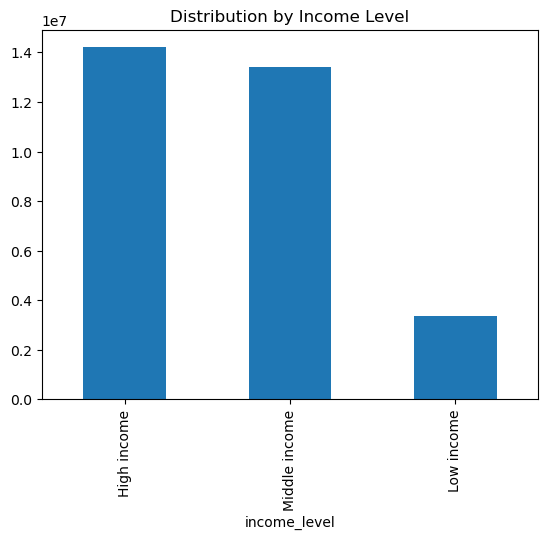

In [103]:
hist = instacart_new['income_level'].value_counts().plot.bar()
plt.title('Distribution by Income Level')

Most of the customer have come from a High income background 

#### 6.3 Using a histogram to show the parental status (to show the age level and if they havee dependants)

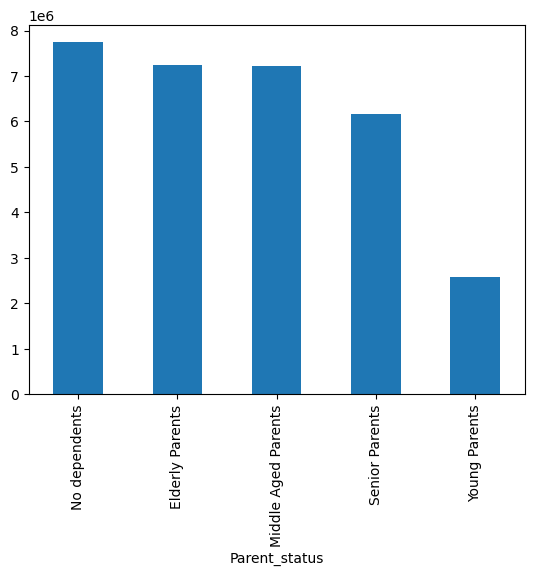

In [39]:
hist_2 = instacart_new['Parent_status'].value_counts().plot.bar()


People with no dependents make up the highest customer population followed by Elderly adults (People from 45-64 who have more than one dependant. Younger parents are significantly lower in the customer base.

# 7. Aggregate the max, mean and min variable on a customer profile

The profiles will be aggregated using usage frequency and expenditure (days_since_prior_orders and price)

In [40]:
instacart_new.loc[instacart_new['prices'] > 100 ] = np.nan

7.1 Aggregate Age Group 

In [41]:
#Aggregate the max, mean and min of age group
instacart_new.groupby('age_group').agg({'days_since_prior_order': ['mean', 'min', 'max'],
                               'prices': ['mean', 'min','max']})

days_since_prior_order               prices           
                              mean  min   max      mean  min   max
age_group                                                         
Elderly                  10.619949  0.0  30.0  7.789025  1.0  25.0
Middle Age               10.622704  0.0  30.0  7.786862  1.0  25.0
Seniors                  10.587678  0.0  30.0  7.796694  1.0  25.0
Young Adult              10.561043  0.0  30.0  7.790646  1.0  25.0

All age group have similar frequency of order at approximately 11 days and an average price of 7.8 

7.2 Aggregate Income Level 

In [42]:
# Aggregate the max, mean and min of income level 
instacart_new.groupby('income_level').agg({'days_since_prior_order': ['mean', 'min', 'max'],
                               'prices': ['mean', 'min','max']})

days_since_prior_order               prices           
                                mean  min   max      mean  min   max
income_level                                                        
High income                10.568790  0.0  30.0  7.953405  1.0  25.0
Low income                 10.934048  0.0  30.0  6.707348  1.0  25.0
Middle income              10.562572  0.0  30.0  7.889817  1.0  25.0

On average, low income customers spend less. All income levels have similar order frequency 

7.3 Aggregate Parent status

In [43]:
# Aggregate the max, mean and min of parent status
instacart_new.groupby('Parent_status').agg({'days_since_prior_order': ['mean', 'min', 'max'],
                               'prices': ['mean', 'min','max']})

days_since_prior_order               prices           
                                      mean  min   max      mean  min   max
Parent_status                                                             
Elderly Parents                  10.656048  0.0  30.0  7.787879  1.0  25.0
Middle Aged Parents              10.618206  0.0  30.0  7.788710  1.0  25.0
No dependents                    10.588672  0.0  30.0  7.789521  1.0  25.0
Senior Parents                   10.594656  0.0  30.0  7.794960  1.0  25.0
Young Parents                    10.508153  0.0  30.0  7.795810  1.0  25.0

From this we can see that being a parent at any age group or having no children does not affect the spending nature of the customers. 

# 8. Compare customer profiles with regions and departments

For this analysis to make sense, the departement name will have to be know. We can do that by impoorting the department documentation 

In [44]:
path_2 = r'/Users/shaquillelee/Documents/Instacart Basket Analysis/Data/Original Data'

In [45]:
#Import Department data 
department = pd.read_csv(os.path.join(path_2,'departments.csv'))

In [46]:
department.columns.values[0] = 'department_id'

In [47]:
#View data
department.head(100)

,department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,department,frozen,other,bakery,produce,alcohol,international,beverages,pets,dry goods pasta,bulk,personal care,meat seafood,pantry,breakfast,canned goods,dairy eggs,household,babies,snacks,deli,missing


In [48]:
# Transpose the data 
department.T

,0
department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta


In [49]:
department = department.T

In [50]:
# Add an index column 
department.reset_index(inplace = True)

In [51]:
# Use the next row as the new header 
new_header = department.iloc[0]

In [52]:
new_header

index    department_id
0           department
Name: 0, dtype: object

In [53]:
department_new = department[1:]

In [54]:
department_new

,index,0
1,1,frozen
2,2,other
3,3,bakery
4,4,produce
5,5,alcohol
6,6,international
7,7,beverages
8,8,pets
9,9,dry goods pasta
10,10,bulk


In [55]:
department_new.columns= new_header

In [56]:
department_new

,department_id,department
1,1,frozen
2,2,other
3,3,bakery
4,4,produce
5,5,alcohol
6,6,international
7,7,beverages
8,8,pets
9,9,dry goods pasta
10,10,bulk


In [57]:
# Next step is to merge both dataset buy first we have to check if the common key is the same datatype 
instacart_new['department_id'].dtype

dtype('float64')

In [58]:
instacart_new.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,Busiest_day,Busiest_days,busiest_period_of_the_day,max_order,loyalty_flag,average_price,Spending,median_days_since_prior_order,order_regularity,first_name,surname,gender,state,age,date_joined,no_of_dependants,martial_status,income,_merge,Region,low activity exclusion,age_group,income_level,Parent_status
0,2539329.0,1,1.0,2.0,8.0,7.0,196.0,1.0,0.0,Soda,77.0,7.0,9.0,Mid-range Products,Regularly busy,Regularly busy,Average Orders,10.0,New Customer,6.367797,Low Spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both,South,Keep,Middle Age,Low income,Middle Aged Parents
1,2398795.0,1,1.0,3.0,7.0,15.0,196.0,1.0,1.0,Soda,77.0,7.0,9.0,Mid-range Products,Regularly busy,Slowest days,Average Orders,10.0,New Customer,6.367797,Low Spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both,South,Keep,Middle Age,Low income,Middle Aged Parents
2,473747.0,1,1.0,3.0,12.0,21.0,196.0,1.0,1.0,Soda,77.0,7.0,9.0,Mid-range Products,Regularly busy,Slowest days,Most Orders,10.0,New Customer,6.367797,Low Spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both,South,Keep,Middle Age,Low income,Middle Aged Parents
3,2254736.0,1,1.0,4.0,7.0,29.0,196.0,1.0,1.0,Soda,77.0,7.0,9.0,Mid-range Products,Least Busy,Slowest days,Average Orders,10.0,New Customer,6.367797,Low Spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both,South,Keep,Middle Age,Low income,Middle Aged Parents
4,431534.0,1,1.0,4.0,15.0,28.0,196.0,1.0,1.0,Soda,77.0,7.0,9.0,Mid-range Products,Least Busy,Slowest days,Most Orders,10.0,New Customer,6.367797,Low Spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both,South,Keep,Middle Age,Low income,Middle Aged Parents


In [59]:
instacart_new['department_id'] = instacart_new['department_id'].astype(str)
instacart_new['department_id'] = instacart_new['department_id'].str.strip()
instacart_new['department_id'] = pd.to_numeric(instacart_new['department_id'], errors='coerce').astype('Int64')
instacart_new.dropna(subset=['department_id'], inplace=True)
instacart_new['department_id'] = instacart_new['department_id'].astype(int)

/var/folders/z4/snghvzgj29jd9tc1ph3523_h0000gn/T/ipykernel_4690/3110958612.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  instacart_new['department_id'] = instacart_new['department_id'].astype(str)
/var/folders/z4/snghvzgj29jd9tc1ph3523_h0000gn/T/ipykernel_4690/3110958612.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  instacart_new['department_id'] = instacart_new['department_id'].str.strip()
/var/folders/z4/snghvzgj29jd9tc1ph3523_h0000gn/T/ipykernel_4690/3110958612.py:3: SettingWithCopyWarning: 


In [60]:
#Change department_id datatype in instacart_new to a string 
instacart_new['department_id'] = instacart_new['department_id'].astype('str')

/var/folders/z4/snghvzgj29jd9tc1ph3523_h0000gn/T/ipykernel_4690/3895239998.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  instacart_new['department_id'] = instacart_new['department_id'].astype('str')


In [61]:
instacart_new['department_id'].dtype

dtype('O')

In [62]:
department_new['department_id'].dtype

dtype('O')

In [63]:
# Merge Both dataframes together 
final_data = instacart_new.merge(department_new, on = 'department_id', indicator = 'merge2')

In [64]:
final_data['merge2'].value_counts()

merge2
both          30960809
left_only            0
right_only           0
Name: count, dtype: int64

In [76]:
final_data.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,Busiest_day,Busiest_days,busiest_period_of_the_day,max_order,loyalty_flag,average_price,Spending,median_days_since_prior_order,order_regularity,first_name,surname,gender,state,age,date_joined,no_of_dependants,martial_status,income,_merge,Region,low activity exclusion,age_group,income_level,Parent_status,department,merge2
0,2539329.0,1,1.0,2.0,8.0,7.0,196.0,1.0,0.0,Soda,77.0,7,9.0,Mid-range Products,Regularly busy,Regularly busy,Average Orders,10.0,New Customer,6.367797,Low Spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both,South,Keep,Middle Age,Low income,Middle Aged Parents,beverages,both
1,2398795.0,1,1.0,3.0,7.0,15.0,196.0,1.0,1.0,Soda,77.0,7,9.0,Mid-range Products,Regularly busy,Slowest days,Average Orders,10.0,New Customer,6.367797,Low Spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both,South,Keep,Middle Age,Low income,Middle Aged Parents,beverages,both
2,473747.0,1,1.0,3.0,12.0,21.0,196.0,1.0,1.0,Soda,77.0,7,9.0,Mid-range Products,Regularly busy,Slowest days,Most Orders,10.0,New Customer,6.367797,Low Spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both,South,Keep,Middle Age,Low income,Middle Aged Parents,beverages,both
3,2254736.0,1,1.0,4.0,7.0,29.0,196.0,1.0,1.0,Soda,77.0,7,9.0,Mid-range Products,Least Busy,Slowest days,Average Orders,10.0,New Customer,6.367797,Low Spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both,South,Keep,Middle Age,Low income,Middle Aged Parents,beverages,both
4,431534.0,1,1.0,4.0,15.0,28.0,196.0,1.0,1.0,Soda,77.0,7,9.0,Mid-range Products,Least Busy,Slowest days,Most Orders,10.0,New Customer,6.367797,Low Spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both,South,Keep,Middle Age,Low income,Middle Aged Parents,beverages,both


#### 8.1 Compare age group with region 

In [66]:
pd.crosstab(final_data['age_group'],final_data['Region'], dropna = True )

Region,Midwest,Northeast,South,West
age_group,,,,
Elderly,2286159,1697348,3194594,2510714
Middle Age,2279109,1679330,3242151,2462150
Seniors,1903801,1484660,2708140,2097928
Young Adult,791487,602738,1164949,855551


#### 8.1.1 Compare age group by department 

In [67]:
pd.crosstab(final_data['age_group'],final_data['department'], dropna = True )

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
age_group,,,,,,,,,,,,,,,,,,,,,
Elderly,46592,129910,350804,814687,211603,10298,315774,1610900,314110,256920,667149,218860,79743,209927,20340,10811,558929,134748,28293,2830853,867564
Middle Age,43881,128453,350445,793938,209189,10441,317197,1622051,314553,256165,656244,217348,80439,208467,20074,10731,554692,132006,28348,2840988,867090
Seniors,36720,106204,295997,684020,175518,8945,267509,1366795,265199,217316,564250,186630,67199,181150,16915,8946,472383,111065,25115,2408104,728549
Young Adult,17481,45825,123582,279256,75562,3767,111594,572559,109972,91735,234088,77019,28610,75237,7439,3923,196701,46540,11304,999328,303203


#### 8.2 Compare income level by region 

In [68]:
pd.crosstab(final_data['income_level'],final_data['Region'], dropna = True )

Region,Midwest,Northeast,South,West
income_level,,,,
High income,3399092,2515811,4662115,3625884
Low income,783797,587159,1142603,849124
Middle income,3077667,2361106,4505116,3451335


#### 8.2.1Compare income level by department 

In [69]:
pd.crosstab(final_data['income_level'],final_data['department'], dropna = True )

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
income_level,,,,,,,,,,,,,,,,,,,,,
High income,69178,196696,527703,1126437,298021,14218,485226,2401546,462089,392709,988452,319958,119987,335535,29452,15749,839920,193437,45089,4236921,1104579
Low income,18050,29240,106757,383121,91525,4676,78975,502363,106448,64481,215177,87216,21636,34278,6547,3886,166061,47791,8612,826314,559529
Middle income,57446,184456,486368,1062343,282326,14557,447873,2268396,435297,364946,918102,292683,114368,304968,28769,14776,776724,183131,39359,4016038,1102298


#### 8.3. Compare parent status by region 

In [70]:
pd.crosstab(final_data['Parent_status'],final_data['Region'], dropna = True )

Region,Midwest,Northeast,South,West
Parent_status,,,,
Elderly Parents,1699647,1285770,2384893,1867443
Middle Aged Parents,1695606,1265460,2417131,1843849
No dependents,1822605,1354345,2581615,1980278
Senior Parents,1433769,1105882,2050496,1582709
Young Parents,608929,452619,875699,652064


#### 8.3.1. Compare parent status by department 

In [71]:
pd.crosstab(final_data['Parent_status'],final_data['department'], dropna = True )

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
Parent_status,,,,,,,,,,,,,,,,,,,,,
Elderly Parents,34039,97064,260950,609669,158054,7803,236798,1202064,232663,192227,497878,165336,59318,157846,15543,8125,417144,101664,21647,2112740,649181
Middle Aged Parents,32670,95086,261360,591146,156058,7905,236527,1214052,234391,191995,492001,162535,60102,156829,14682,7820,415700,98403,20708,2124049,648027
No dependents,36852,103328,281395,645341,166720,8000,251020,1293203,253382,204296,529348,171358,64461,165878,15935,8714,443904,106227,23602,2275441,690438
Senior Parents,27565,80312,223579,515378,132980,6851,202766,1028349,199831,164020,423146,141616,50686,136819,12932,6791,356648,82973,18349,1813012,548253
Young Parents,13548,34602,93544,210367,58060,2892,84963,434637,83567,69598,179358,59012,21424,57409,5676,2961,149309,35092,8754,754031,230507


# 9. Show suitable charts to illustrate results 

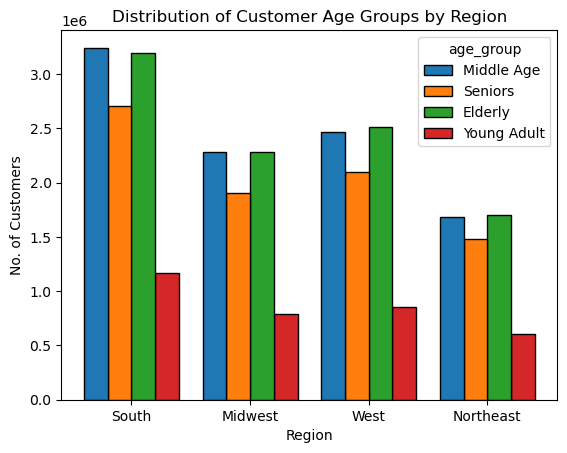

In [72]:
age_group = sns.histplot(data=final_data, x='Region', hue='age_group', multiple='dodge', shrink=.8, alpha=1)
#Format histogram 
plt.title('Distribution of Customer Age Groups by Region')
plt.ylabel('No. of Customers')
plt.xlabel('Region')
#Save Figure
age_group.figure.savefig(os.path.join(path,'Analysis','Visualizations', 'age_group.png'))


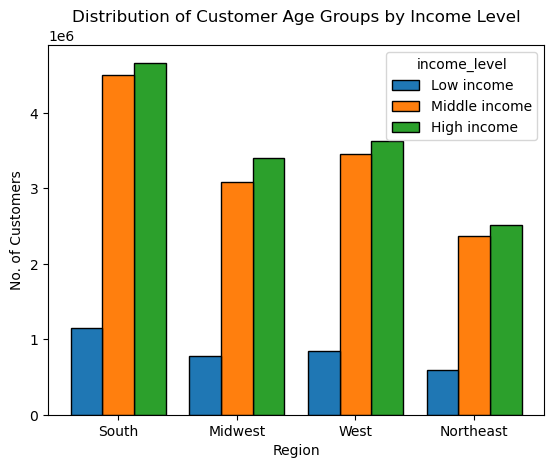

In [73]:
income_level = sns.histplot(data=final_data, x='Region', hue='income_level', multiple='dodge', shrink=.8, alpha=1)
#Format histogram
plt.title('Distribution of Customer Age Groups by Income Level')
plt.ylabel('No. of Customers')
plt.xlabel('Region')
#Save Figure
income_level.figure.savefig(os.path.join(path,'Analysis','Visualizations', 'income_level.png'))


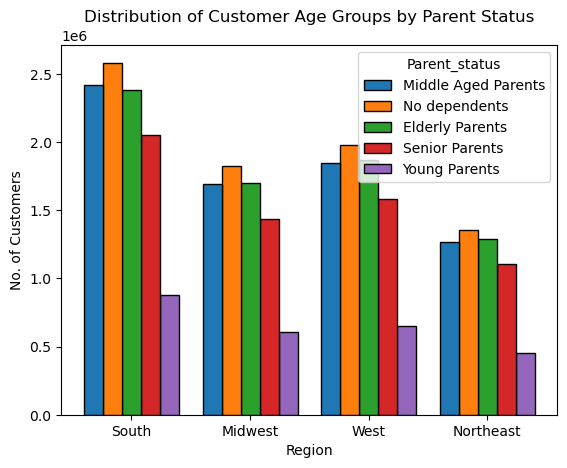

In [74]:
parent_status = sns.histplot(data=final_data, x='Region', hue='Parent_status', multiple='dodge', shrink=.8, alpha=1)
#Format histogram
plt.title('Distribution of Customer Age Groups by Parent Status')
plt.ylabel('No. of Customers')
plt.xlabel('Region')
parent_status.figure.savefig(os.path.join(path,'Analysis','Visualizations', 'parent_status.png'))


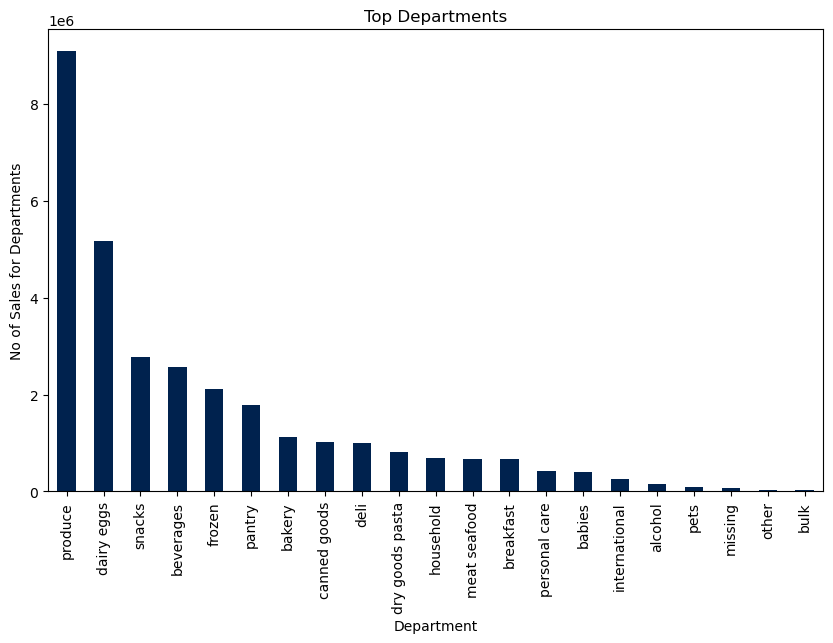

In [102]:
department_hist = plt.figure(figsize=(10, 6))
final_data['department'].value_counts().plot(kind='bar', cmap ='cividis', orientation= 'vertical')
plt.title('Top Departments')
plt.xlabel('Department')
plt.ylabel('No of Sales for Departments')
department_hist.figure.savefig(os.path.join(path,'Analysis','Visualizations', 'department_hist.png'))


# 10. Export data 

In [75]:
#Export data as pickle
final_data.to_pickle(os.path.join(path, 'Data', 'Prepared Data', 'final_data.pkl'))